In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

## LDA

In [2]:
# load data for LDA
wine = datasets.load_wine()
X, y = wine.data, wine.target

In [3]:
# import package from my custom generative classifiers
from MyGenerativeClassifiers import LDA

In [4]:
# fit and see what the accuracy is
lda = LDA()
lda.fit(X, y)
yhat = lda.classify(X)
np.mean(yhat == y)

1.0

Above, we can see that the function perfectly fit the data provided. This is great! Although we know that the performance should be tested through a validation set.

Next we can visualize the boundaries for LDA. To visualize this in 2D, we will take only 2 columns from the features for the wine dataset.

In [5]:
def graph_boundaries(X, model, model_title, n0 = 100, n1 = 100, figsize = (10, 8), label_every = 4):
    """
    function that plots fitted model's boundary lines
    """
        
    # Generate X for plotting 
    d0_range = np.linspace(X[:,0].min(), X[:,0].max(), n0)
    d1_range = np.linspace(X[:,1].min(), X[:,1].max(), n1)
    X_plot = np.array(np.meshgrid(d0_range, d1_range)).T.reshape(-1, 2)
    
    # Get class predictions
    y_plot = model.classify(X_plot).astype(int)
    
    # Plot 
    fig, ax = plt.subplots(figsize = figsize)
    sns.heatmap(y_plot.reshape(n0, n1).T,
               cmap = sns.color_palette('Pastel1', 3),
               cbar_kws = {'ticks':sorted(np.unique(y_plot))}) 
    plt.show()

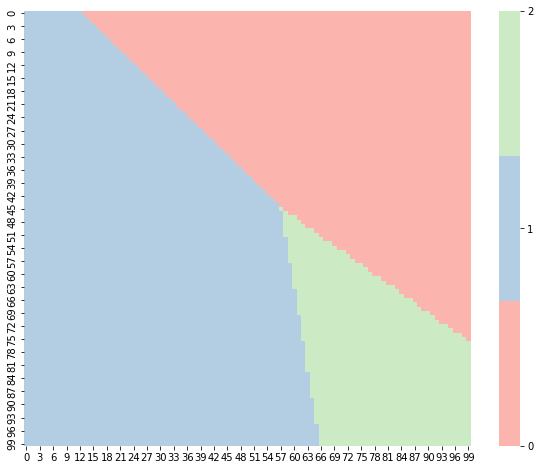

In [6]:
X_2d = X.copy()[:,2:4]
lda_2d = LDA()
lda_2d.fit(X_2d, y)
graph_boundaries(X_2d, lda_2d, 'LDA')

## QDA

In [7]:
# import the class
from MyGenerativeClassifiers import QDA

In [8]:
# make an instance
qda = QDA()
# fit the model
qda.fit(X, y)
# make the classifications
y_hat = qda.classify(X)
# find the accuracy
np.mean(y_hat == y)

0.9943820224719101

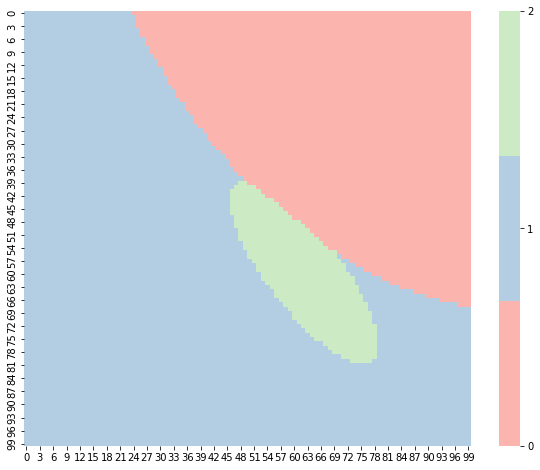

In [9]:
qda_2d = QDA()
qda_2d.fit(X_2d, y)
graph_boundaries(X_2d, qda_2d, 'QDA')

## Naive Bayes

In [10]:
# import the package
from MyGenerativeClassifiers import NaiveBayes

In [11]:
nb = NaiveBayes()
nb.fit(X, y)
y_hat == nb.classify(X)
np.mean(y_hat == y)

0.9943820224719101

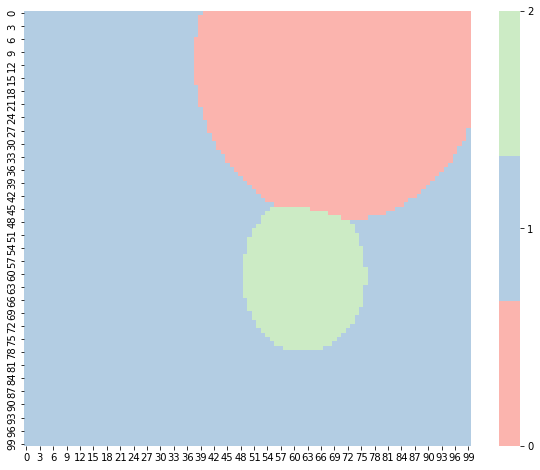

In [12]:
nb_2d = NaiveBayes()
nb_2d.fit(X_2d, y)
graph_boundaries(X_2d, nb_2d, 'Naive Bayes')